# Licencias

## Licencia Notebook
Casting Inteligente: Algoritmos para la selección óptima de actores

Copyright (C) 2024  Alaix, Alvarado, Choconta & Martinez

Este archivo es parte de FilmCast.

FilmCast es software libre: puedes redistribuirlo y/o modificarlo bajo los términos de la Licencia Pública General de GNU tal como fue publicada por la Free Software Foundation, ya sea la versión 3 de la Licencia o cualquier versión posterior.

FilmCast se distribuye con la esperanza de que sea útil, pero SIN NINGUNA GARANTÍA; ni siquiera la garantía implícita de COMERCIABILIDAD o IDONEIDAD PARA UN PROPÓSITO PARTICULAR. Consulta la Licencia Pública General de GNU para más detalles.

Deberías haber recibido una copia de la Licencia Pública General de GNU junto con FilmCast. Si no, consulta https://www.gnu.org/licenses/.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/GPLv3_Logo.svg/1920px-GPLv3_Logo.svg.png" alt="GPL" width="400" height="200">

## Licencia Dataset

Copyright (C) Anthony Therrien [Kaggle](https://www.kaggle.com/datasets/anthonytherrien/a-synthetic-journey-through-10000-actor-profiles/data).

Bajo la licencia CC BY-SA 4.0: Attribution-ShareAlike 4.0 International

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e5/CC_BY-SA_icon.svg/1200px-CC_BY-SA_icon.svg.png" alt="CC" width="380" height="125">

# Librerias

## Instalar librerías
---

In [1]:
#!pip3 install -r ./requirements.txt

## Importar librerías
---

In [2]:
from Functions import df_loader,plotBar,plotBox,plotScatter,plotPie

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Preprocessing

## Dataset original

In [3]:
df_base = df_loader(ruta='../Datasets/Actores.csv',separador=';')

In [4]:
df_base.sample(5)

,Name,Age,Gender,Nationality,Years Active,Genre Specialization,Beauty,Skill Level,Education Level,Award Wins,Media Mentions,Social Media Followers,Social Media Likes,Network Size,Income
7562,Katherine Brown,45,Male,USA,12,Action,5.52,7.07,University,8,46,16690,4949,21,703257.27
5863,Randy Phillips,37,Female,Canada,19,Comedy,9.00,6.23,College,8,39,15848,4814,24,1297553.35
253,Mary Douglas,44,Female,USA,14,Comedy,9.77,9.55,University,9,38,17369,5151,24,1064446.12
10014,Thomas Martinez,55,Male,USA,20,Action,6.11,13.99,Graduate,12,49,18388,5584,29,1402851.49
2273,Dana Christensen,20,Female,USA,2,Drama,6.77,10.53,University,8,30,16502,4951,23,438543.27


In [5]:
df_base.describe().round(1)

,Age,Years Active,Beauty,Skill Level,Award Wins,Media Mentions,Social Media Followers,Social Media Likes,Network Size,Income
count,12489.0,12489.0,12489.0,12489.0,12489.0,12489.0,12489.0,12489.0,12489.0,12489.0
mean,36.8,12.4,7.6,8.7,8.2,38.2,16583.7,5098.6,24.9,762708.4
std,10.1,4.6,1.7,3.6,2.3,7.2,1610.9,302.8,4.1,303306.4
min,18.0,0.0,1.2,0.0,2.0,17.0,10507.0,3944.0,13.0,162833.2
25%,29.0,10.0,6.3,6.1,7.0,33.0,15484.0,4891.0,22.0,547011.5
50%,36.0,13.0,7.5,8.5,8.0,38.0,16518.0,5090.0,25.0,709629.7
75%,44.0,15.0,8.8,11.1,10.0,43.0,17675.0,5302.0,28.0,921311.9
max,69.0,30.0,14.2,23.7,18.0,66.0,24976.0,6479.0,44.0,2677276.3


In [6]:
df_base.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12489 entries, 0 to 12488
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    12489 non-null  object 
 1   Age                     12489 non-null  int64  
 2   Gender                  12489 non-null  object 
 3   Nationality             12489 non-null  object 
 4   Years Active            12489 non-null  int64  
 5   Genre Specialization    12489 non-null  object 
 6   Beauty                  12489 non-null  float64
 7   Skill Level             12489 non-null  float64
 8   Education Level         12489 non-null  object 
 9   Award Wins              12489 non-null  int64  
 10  Media Mentions          12489 non-null  int64  
 11  Social Media Followers  12489 non-null  int64  
 12  Social Media Likes      12489 non-null  int64  
 13  Network Size            12489 non-null  int64  
 14  Income                  12489 non-null

## Cambio de formación de categorico a ordinal

In [7]:
education_rank = {
    'High School': 1,
    'College': 2,
    'University': 3,
    'Graduate': 4
}

# Map the values in the column to their corresponding rank
df_base['Education Rank'] = df_base['Education Level'].map(education_rank)
df_base.drop(columns=['Education Level'], inplace=True)

## Limpieza de duplicados

In [8]:
df=df_base.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7954 entries, 0 to 12483
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    7954 non-null   object 
 1   Age                     7954 non-null   int64  
 2   Gender                  7954 non-null   object 
 3   Nationality             7954 non-null   object 
 4   Years Active            7954 non-null   int64  
 5   Genre Specialization    7954 non-null   object 
 6   Beauty                  7954 non-null   float64
 7   Skill Level             7954 non-null   float64
 8   Award Wins              7954 non-null   int64  
 9   Media Mentions          7954 non-null   int64  
 10  Social Media Followers  7954 non-null   int64  
 11  Social Media Likes      7954 non-null   int64  
 12  Network Size            7954 non-null   int64  
 13  Income                  7954 non-null   float64
 14  Education Rank          7954 non-null   int6

## Ver salida final

In [9]:
df_base.sample(5)

,Name,Age,Gender,Nationality,Years Active,Genre Specialization,Beauty,Skill Level,Award Wins,Media Mentions,Social Media Followers,Social Media Likes,Network Size,Income,Education Rank
2026,Richard James,36,Female,USA,12,Action,9.88,8.31,10,47,15831,5072,27,1311013.15,3
11668,Richard James,36,Female,USA,12,Action,9.88,8.31,10,47,15831,5072,27,1311013.15,3
3070,Cheryl Walker,21,Female,USA,3,Action,4.57,6.56,5,37,16805,5364,25,336223.95,3
4009,Jennifer Bonilla,32,Male,USA,13,Action,6.55,9.62,8,45,15926,4931,21,474818.72,4
2485,Tiffany White,37,Male,Canada,13,Sci-Fi,6.50,13.81,10,35,16772,5565,25,740531.16,4


## Partir dataset en categoricas/numericas

Dataframes finales:
- `df_cat`: Posee las variables categóricas; `Gender`, `Nationality`, `Genre Specialization`, y, `Education Level`.
- `df_num`: Posee las variables numéricas; `Age`, `Years Active`, `Beauty`, `Skill Level`, `Award Wins`, `Media Mentions`, `Social Media Followers`, `Social Media Likes`, `Network Size`, y, `Income`.

---

In [10]:
df_cat = df[[x for x in df.columns if df.dtypes[x] == 'O' and x != 'Name']]
df_num = df[[x for x in df.columns if df.dtypes[x] == 'int64' or df.dtypes[x] == 'float64']]

In [11]:
print(df_cat.columns)
print(df_num.columns)

Index(['Gender', 'Nationality', 'Genre Specialization'], dtype='object')
Index(['Age', 'Years Active', 'Beauty', 'Skill Level', 'Award Wins',
       'Media Mentions', 'Social Media Followers', 'Social Media Likes',
       'Network Size', 'Income', 'Education Rank'],
      dtype='object')


## Preprocesado categoricas

### Preview categorias

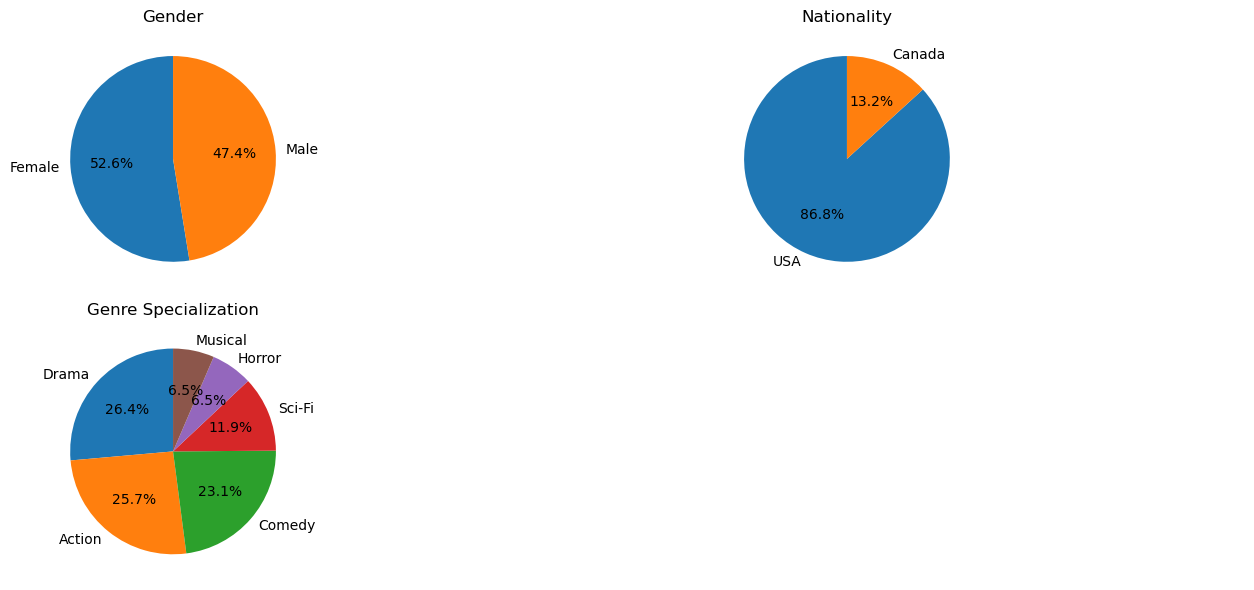

In [12]:
df_counts = {col: df_cat[col].value_counts() for col in df_cat.columns}

# Create subplots
n_cols = 2  # Number of columns in the matrix
n_rows = (len(df_cat.columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))

for i, col in enumerate(df_cat.columns):
    ax = axes[i // n_cols, i % n_cols]  # Get the current subplot
    df_counts[col].plot.pie(ax=ax, autopct='%1.1f%%', startangle=90, title=col)
    ax.set_ylabel('')  # Hide the y-label for pie charts
    ax.set_aspect('equal')  # Equal aspect ratio ensures pie is drawn as a circle

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    axes[j // n_cols, j % n_cols].axis('off')

plt.tight_layout()
#plt.savefig('./plots/categoricas.jpg', format='jpg', dpi=72)

### One Hot-Encoder para variables categóricas
---

In [13]:
encoder = OneHotEncoder(sparse_output=False)

In [14]:
encoded_df = encoder.fit_transform(df_cat)
nombres = encoder.get_feature_names_out(df_cat.columns)
df_OHE = pd.DataFrame(encoded_df, columns=nombres)
df_OHE.sample(5)

,Gender_Female,Gender_Male,Nationality_Canada,Nationality_USA,Genre Specialization_Action,Genre Specialization_Comedy,Genre Specialization_Drama,Genre Specialization_Horror,Genre Specialization_Musical,Genre Specialization_Sci-Fi
6361,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6994,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1255,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2712,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3206,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


Después de pasar por la función One Hot-Encoder, la cantidad de variables incrementa a 14. Las cuales son:
- `Gender_Female`
- `Gender_Male`
- `Nationality_Canada`
- `Nationality_USA`
- `Genre Specialization_Action`
- `Genre Specialization_Comedy`
- `Genre Specialization_Drama`
- `Genre Specialization_Horror`
- `Genre Specialization_Musical`
- `Genre Specialization_Sci-Fi`
- `Education Level_College`
- `Education Level_Graduate`
- `Education Level_High School`
- `Education Level_University`

## Preprocesado numéricas

### Normalización de variables numéricas (rango de 0 a 1)
---

In [15]:
scaler = MinMaxScaler()
df_num_norm = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)
df_num_norm.sample(5)

,Age,Years Active,Beauty,Skill Level,Award Wins,Media Mentions,Social Media Followers,Social Media Likes,Network Size,Income,Education Rank
1512,0.549020,0.600000,0.315951,0.448145,0.5000,0.571429,0.508052,0.659961,0.258065,0.215752,0.333333
6349,0.921569,0.433333,0.584356,0.252951,0.3750,0.142857,0.146935,0.403945,0.516129,0.220574,0.333333
1928,0.588235,0.466667,0.315184,0.410624,0.3125,0.244898,0.501832,0.386193,0.451613,0.177700,1.000000
2822,0.098039,0.166667,0.434816,0.736088,0.3750,0.448980,0.487041,0.654832,0.387097,0.144388,0.666667
3981,0.176471,0.300000,0.421779,0.289629,0.2500,0.510204,0.289585,0.430375,0.290323,0.114664,0.333333


### Sin Min Max

In [16]:
#sns.pairplot(df_num).savefig('./plots/sin_min_max.jpg', format='jpg', dpi=72)

![Description](./plots/sin_min_max.jpg)

### Con Min Max

In [17]:
#sns.pairplot(df_num_norm).savefig('./plots/con_min_max.jpg', format='jpg', dpi=72)

![Description](./plots/con_min_max.jpg)


## Unificación de ambos DF

### Crear el DataFrame concatenado

Se unen ambos Dataframes para tener los datos listos y preparados

---

In [18]:
df_final = pd.concat([df_num_norm, df_OHE], axis=1)
df_final.sample(5)

,Age,Years Active,Beauty,Skill Level,Award Wins,Media Mentions,Social Media Followers,Social Media Likes,Network Size,Income,...,Gender_Female,Gender_Male,Nationality_Canada,Nationality_USA,Genre Specialization_Action,Genre Specialization_Comedy,Genre Specialization_Drama,Genre Specialization_Horror,Genre Specialization_Musical,Genre Specialization_Sci-Fi
3504,0.098039,0.166667,0.464724,0.098651,0.1875,0.530612,0.322759,0.345957,0.322581,0.134993,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
692,0.235294,0.400000,0.671779,0.269815,0.3750,0.469388,0.254268,0.178698,0.483871,0.254776,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1966,0.647059,0.466667,0.234663,0.538786,0.4375,0.306122,0.484484,0.560552,0.387097,0.199333,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1450,0.313725,0.533333,0.432515,0.121838,0.2500,0.163265,0.367130,0.566864,0.580645,0.275739,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4985,0.137255,0.233333,0.438650,0.207841,0.1875,0.448980,0.587325,0.678107,0.451613,0.139489,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
df_final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7954 entries, 0 to 7953
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           7954 non-null   float64
 1   Years Active                  7954 non-null   float64
 2   Beauty                        7954 non-null   float64
 3   Skill Level                   7954 non-null   float64
 4   Award Wins                    7954 non-null   float64
 5   Media Mentions                7954 non-null   float64
 6   Social Media Followers        7954 non-null   float64
 7   Social Media Likes            7954 non-null   float64
 8   Network Size                  7954 non-null   float64
 9   Income                        7954 non-null   float64
 10  Education Rank                7954 non-null   float64
 11  Gender_Female                 7954 non-null   float64
 12  Gender_Male                   7954 non-null   float64
 13  Nat

### Sistema de recomendación basado en input de usuario

In [20]:
def calculate_numerical_score(value, target_min, target_max):
    if target_min <= value <= target_max:
        return 1
    else:
        return max(0, 1 - abs(value - target_min) / (target_max - target_min))


In [21]:
def calculate_categorical_score(value, target):
    return 1 if value == target else 0


In [22]:
#total_score = (0.5 * calculate_numerical_score(actor_age, target_age_min, target_age_max) +
#               0.3 * calculate_numerical_score(actor_skill, target_skill_min, target_skill_max) +
#               0.2 * calculate_categorical_score(actor_nationality, target_nationality))


In [23]:
df_final['Recommendation_Score'] = (
    0.2 * df_final['Years Active'] +
    0.3 * df_final['Skill Level'] +
    0.2 * df_final['Award Wins'] +
    0.1 * df_final['Media Mentions'] +
    0.2 * df_final['Social Media Followers']
)


# Train Test

In [24]:
from sklearn.model_selection import train_test_split

y=df_final['Recommendation_Score']
x=df_final.drop(columns=['Recommendation_Score'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Modelo SVR

In [26]:
from sklearn.svm import SVR

# Define and fit the SVR model
svr_model = SVR(kernel='rbf')  # rbf kernel works well for non-linear data
svr_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = svr_model.predict(X_test)


In [27]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.001264512677978206


In [28]:
from sklearn.metrics import mean_absolute_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.028128108287399315
Root Mean Squared Error (RMSE): 0.0355599870356867


In [29]:
df_final.to_csv('../Model/Lud/app/ActoresFilter.csv', index=False)